In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.io as si
import imread
import pandas as pd
from collections import OrderedDict
plt.rcParams['axes.formatter.limits'] = [-3,3]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12

%matplotlib inline
%config InlineBackend.figure_format = 'retina'



# 1 K-means Clustering

## 1.1 Implementing K-means

In [2]:
def findClostCentroids(X, centroids):
    
    K = len(centroids)
    # initialize an array of zeroes. 
    norm = np.zeros((X.shape[0], K))
    for j in range(K):
        # Compute the distance for each
        norm[:,j] = np.sum(np.abs(X - centroids[j]), axis=1)**2
    # Return the smallest value.
    idx = np.argmin(norm, axis=1)
    return idx

def computeCentroids(X, idx, K):
    
    m, n = X.shape
    
    centroids = np.zeros((K,n))
    for j in range(K):
        ind = j == idx
        centroids[j,:] = np.mean(X[ind,:], axis=0)
    
    return centroids

In [3]:
# Read the data from a csv file. 
a = pd.read_csv('iris.csv', header=None)
# Convert the pandas dataset to a Numpy Array.
dataset = list(map(list, zip(a[0].values.tolist(),a[1].values.tolist())))
X = np.array(dataset)
# This is the data set that we are going to use
X

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6],
       [ 5.4,  3.9],
       [ 4.6,  3.4],
       [ 5. ,  3.4],
       [ 4.4,  2.9],
       [ 4.9,  3.1],
       [ 5.4,  3.7],
       [ 4.8,  3.4],
       [ 4.8,  3. ],
       [ 4.3,  3. ],
       [ 5.8,  4. ],
       [ 5.7,  4.4],
       [ 5.4,  3.9],
       [ 5.1,  3.5],
       [ 5.7,  3.8],
       [ 5.1,  3.8],
       [ 5.4,  3.4],
       [ 5.1,  3.7],
       [ 4.6,  3.6],
       [ 5.1,  3.3],
       [ 4.8,  3.4],
       [ 5. ,  3. ],
       [ 5. ,  3.4],
       [ 5.2,  3.5],
       [ 5.2,  3.4],
       [ 4.7,  3.2],
       [ 4.8,  3.1],
       [ 5.4,  3.4],
       [ 5.2,  4.1],
       [ 5.5,  4.2],
       [ 4.9,  3.1],
       [ 5. ,  3.2],
       [ 5.5,  3.5],
       [ 4.9,  3.1],
       [ 4.4,  3. ],
       [ 5.1,  3.4],
       [ 5. ,  3.5],
       [ 4.5,  2.3],
       [ 4.4,  3.2],
       [ 5. ,  3.5],
       [ 5.1,  3.8],
       [ 4.8,  3. ],
       [ 5.1,  3.8],
       [ 4.6,

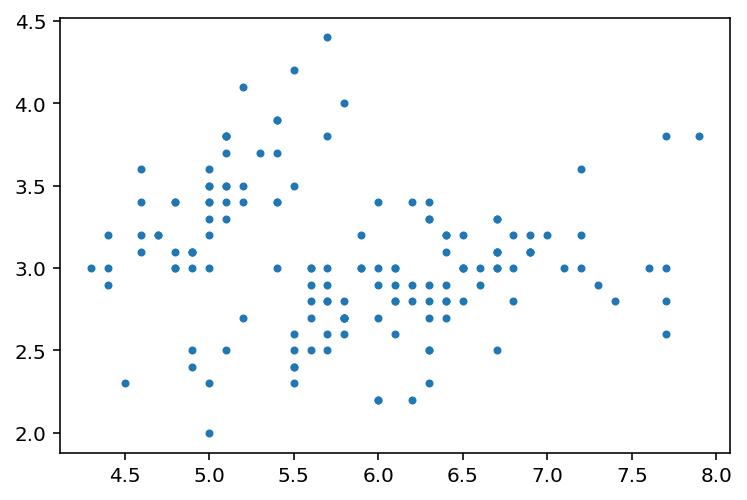

In [4]:
plt.plot(X[:,0], X[:,1], '.')

### 1.1.1 Finded closest centroids

In [5]:
K = 3
#initial_centroids =[np.array([3,3]), np.array([6,2]), 
#                     np.array([8,5])]

initial_centroids =[np.array([0,0]), np.array([1,1]), 
                     np.array([2,2])]

idx = findClostCentroids(X, initial_centroids)
print(idx[:3])

[2 2 2]


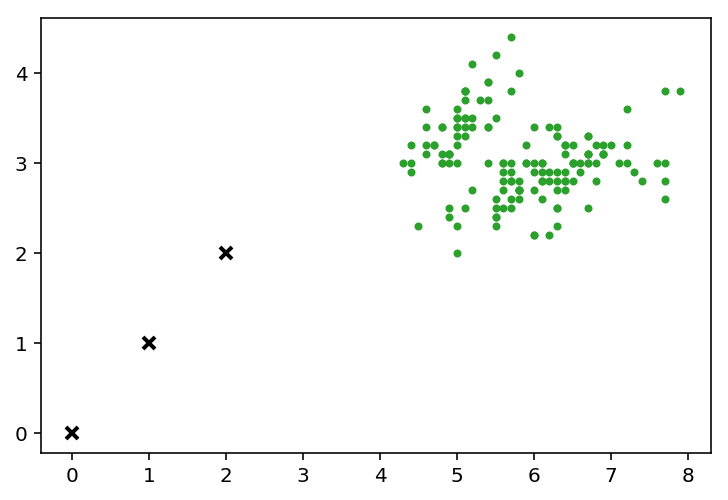

In [6]:
for ii in range(K):
    ind = idx == ii
    plt.plot(X[ind[:],0], X[ind[:],1], '.')
    plt.plot(initial_centroids[ii][0], 
             initial_centroids[ii][1], 'xk', 
             mew=2)

### 1.1.2 Computing the centroid means

In [7]:
centroids = computeCentroids(X, idx, K)
print(centroids)

[[        nan         nan]
 [        nan         nan]
 [ 5.84333333  3.054     ]]


/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


## 1.2 K-means on example data set

In [ ]:
def runkMeans(X, initial_centroids, max_iters, 
              plot_progress=True):
    
    # initial values
    m, n = X.shape
    K = len(initial_centroids)
    centroids = [ic for ic in initial_centroids]
    all_centroids = []
    idx = np.zeros(m)
    
    for ii in range(max_iters):
        
        idx = findClostCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)
        all_centroids.append(centroids)
        
    if plot_progress:
        
        for j in range(K):
            x = [ac[j,0] for ac in all_centroids]
            y = [ac[j,1] for ac in all_centroids]
            plt.plot(x, y, 'x-', color='k', mew=2)
            
        for ii in range(K):
            ind = idx == ii
            plt.plot(X[ind[:],0], X[ind[:],1], '.')
        
    return centroids, idx

In [ ]:
K = 3
max_iters = 30
initial_centroids = [np.array([3,3]), np.array([6,2]), 
                     np.array([8,5])]

centroids, idx = runkMeans(X, initial_centroids, max_iters)

## 1.3 Random Initialization

In [ ]:
def kMeansInitCentroids(X, K):
    
    ind = np.random.permutation(X.shape[0])
    
    return X[ind[:K], :]

In [ ]:
K = 3
max_iters = 20

for ii in range(10):
    plt.figure()
    initial_centroids = kMeansInitCentroids(X,K)
    centroids, idx = runkMeans(X, initial_centroids, max_iters)

## 1.4 Image compression with K-means

In [ ]:
a = si.loadmat('bird_small.mat')
A = a['A'] / 255
X = np.reshape(A, (A.shape[0]*A.shape[1],3))

In [ ]:
plt.imshow(A, extent=[0, 1, 0, 1])


In [ ]:
K = 20
max_iters=100

initial_centroids = kMeansInitCentroids(X, K)

centroids, idx = runkMeans(X, initial_centroids, max_iters, 
                           plot_progress=False)

In [ ]:
# find closest members
idx = findClostCentroids(X, centroids)

# map each pixex to its centroid value
X_recovered = centroids[idx,:]

# reshape
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], 3))

In [ ]:
fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(121)
ax1.imshow(A, extent=[0, 1, 0, 1])
ax1.set_title('Original')

ax2 = fig.add_subplot(122)
ax2.imshow(X_recovered, extent=[0, 1, 0, 1])
ax2.set_title('Recovered')